# CNA Homework

## Part 1

**Reddit Networks**

Using the [Reddit networks dataset],(http://dynamics.cs.washington.edu/nobackup/reddit/) select the subreddit of your favorite TV show. Using the data of the selected subreddit, answer the following questions:

*Task 1*: Calculate and visualize the degree distribution of the vertices in the network

In [113]:
import os
import turicreate as tc 
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [58]:
g = tc.SGraph()
graphs_dir = 'data'
sframes_paths = [graphs_dir +'/' + s for s in os.listdir(graphs_dir)]
for folder in tqdm(sframes_paths):
    if not folder.endswith(".sgraph"):
        continue
    subG = tc.load_sgraph(folder)
    g = g.add_vertices(subG.get_vertices())
    g = g.add_edges(subG.get_edges())

In [30]:
m = tc.degree_counting.create(g)
tc.visualization.histogram(m['graph'].vertices['in_degree'], title='Distribution of in degree')

Materializing SArray

In [18]:
tc.visualization.histogram(m['graph'].vertices['out_degree'], title='Distribution of out degree')

Materializing SArray

In [59]:
 pr = tc.pagerank.create(g)

Counting out degree

Done counting out degree

+-----------+-----------------------+

| Iteration | L1 change in pagerank |

+-----------+-----------------------+

| 1         | 2801.39               |

| 2         | 825.155               |

| 3         | 341.218               |

| 4         | 176.888               |

| 5         | 106.359               |

| 6         | 70.1775               |

| 7         | 49.5858               |

| 8         | 36.2362               |

| 9         | 26.855                |

| 10        | 20.1534               |

| 11        | 15.2253               |

| 12        | 11.619                |

| 13        | 8.92702               |

| 14        | 6.89036               |

| 15        | 5.34966               |

| 16        | 4.17004               |

| 17        | 3.269                 |

| 18        | 2.57402               |

| 19        | 2.03913               |

| 20        | 1.62088               |

+-----------+-----------------------+

In [60]:
pr_out = pr['pagerank']
g.vertices['pagerank'] = pr['graph'].vertices['pagerank']


In [82]:
sub_vertices = g.vertices.sort('pagerank', ascending=False)[:20]

subgraph = g.get_neighborhood(ids=sub_vertices['__id'], radius=1, full_subgraph=False)    



In [83]:
subgraph

SGraph({'num_edges': 1309, 'num_vertices': 709})
Vertex Fields:['__id', 'mindate', 'maxdate', 'pagerank']
Edge Fields:['__src_id', '__dst_id', 'maxdate', 'mindate', 'weight']

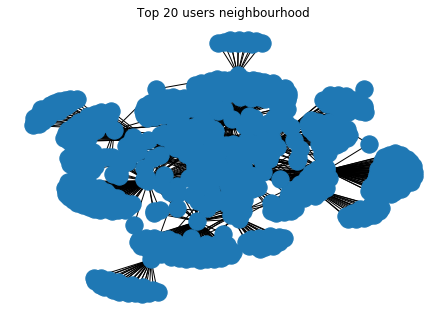

In [85]:
ng = nx.Graph()
ng.add_nodes_from(subgraph.vertices['__id'])
ng.add_edges_from(subgraph.edges['__src_id','__dst_id'].apply(lambda row: [v for (k,v) in row.items()]))


nx.draw(ng)
plt.title('Top 20 users neighbourhood')
plt.show()

In [92]:
ng = nx.DiGraph()
ng.add_nodes_from(g.vertices['__id'])
ng.add_edges_from(g.edges['__src_id','__dst_id'].apply(lambda row: [v for (k,v) in row.items()]))

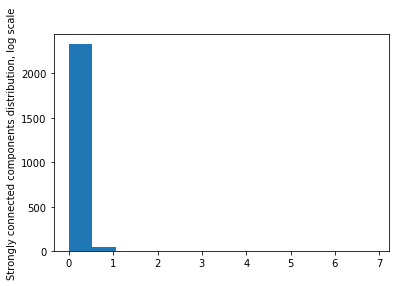

In [118]:
cc = nx.strongly_connected_components(ng)
comps = np.array(sorted([len(c) for c in cc]))

plt.hist(np.log(comps),  bins = 'auto')
plt.ylabel('Strongly connected components distribution, log scale');


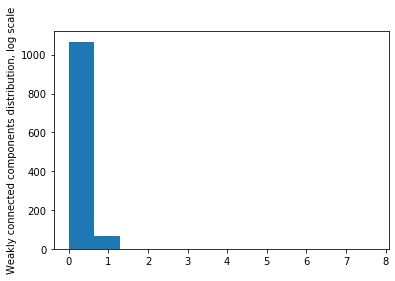

In [127]:
cc = nx.weakly_connected_components(ng)
comps = np.array(sorted([len(c) for c in cc]))

plt.hist(np.log(comps),  bins = 'auto')

plt.ylabel('Weakly connected components distribution, log scale');


In [129]:
from networkx.algorithms import community
communities_generator = community.girvan_newman(ng)
top_level_communities = next(communities_generator)
# community.greedy_modularity_communities(ng)

In [145]:
next_level_communities = next(communities_generator)

In [159]:
communities_more_than_one = [c for c in top_level_communities if len(c) > 1]
centrality = nx.closeness_centrality(ng)


In [171]:
for c in communities_more_than_one:
    comm_centrality = { v: centrality[v] for v in c }
    comm_centrality_sorted = sorted(comm_centrality.items(), key=lambda item: item[1])
    print('second most central in community', comm_centrality_sorted[-2])


second most central in community ('fielderwielder', 0.1408312286665287)
second most central in community ('reddit_crunch', 0.0)
second most central in community ('sexrobot_sexrobot', 0.0)
second most central in community ('Taroso', 0.0)
second most central in community ('TheFreakingBatman', 0.000293513354857646)
second most central in community ('robtheviking', 0.0)
second most central in community ('dat828', 0.0)
second most central in community ('Fighter0fTheNightman', 0.000293513354857646)
second most central in community ('FreeRePhils', 0.0)
second most central in community ('LUIGI2323', 0.0)
second most central in community ('NoKittyMyCheesyPoof', 0.08843175634430017)
second most central in community ('tr1lobyte', 0.0)
second most central in community ('mohammad_on_speed', 0.0)
second most central in community ('aflatminor', 0.00039135113981019463)
second most central in community ('Blanket_Criticism', 0.0)
second most central in community ('Randomwordcombo', 0.000293513354857646)

*Task 2*: Create a subgraph of the top-20 users according to the PageRank algorithm. Draw the subgraph.

*Task 3*: Visualize the distribution of the network's strongly and weakly connected components.

*Task 4*: Split the network into communities, and find the second most central vertex in each community.

## Part 2

In [172]:
import networkx as nx
from networkx.algorithms.centrality import *
from scipy.stats import spearmanr 
from networkx.generators.geometric import random_geometric_graph
from networkx.algorithms.community import * 

### Lets generate some networks

Every network contains four sets of nodes. $a\in \{0.1,0.01\}$ is the probability for an edge between two nodes in the same set. $b\in \{0.1,0.01\}$ is the probability for an edge between two nodes in different communities.

In [208]:
blocks = [100,100,100,100]
probs = [
        [[a,b,b,b],
         [b,a,b,b],
         [b,b,a,b],
         [b,b,b,a]]
    for a,b in [(0.01,0.01),(0.1,0.01),(0.01,0.1)]
    ]
probs

[[[0.01, 0.01, 0.01, 0.01],
  [0.01, 0.01, 0.01, 0.01],
  [0.01, 0.01, 0.01, 0.01],
  [0.01, 0.01, 0.01, 0.01]],
 [[0.1, 0.01, 0.01, 0.01],
  [0.01, 0.1, 0.01, 0.01],
  [0.01, 0.01, 0.1, 0.01],
  [0.01, 0.01, 0.01, 0.1]],
 [[0.01, 0.1, 0.1, 0.1],
  [0.1, 0.01, 0.1, 0.1],
  [0.1, 0.1, 0.01, 0.1],
  [0.1, 0.1, 0.1, 0.01]]]

In [174]:
nets = [nx.generators.community.stochastic_block_model(blocks,p) for p in probs*100]
print("There are {} networks in total.".format(len(nets)))

There are 300 networks in total.


### Node centrality 
Your code is here: replace [] accordingly to the comment in the row



In [180]:
centralities =  [ {
                    'degree': list(nx.degree_centrality(G).values()), #replace [] with a sequence of node degree centralities 
                    'closeness': list(nx.closeness_centrality(G)).values(),
                    'betweenness': list(betweenness_centrality(G).values())
                  } 
                for G in nets
                ]
centralities[1]

{'degree': {0: 0.03759398496240601,
  1: 0.047619047619047616,
  2: 0.03258145363408521,
  3: 0.02506265664160401,
  4: 0.03258145363408521,
  5: 0.03759398496240601,
  6: 0.05012531328320802,
  7: 0.02756892230576441,
  8: 0.02756892230576441,
  9: 0.03508771929824561,
  10: 0.03508771929824561,
  11: 0.02756892230576441,
  12: 0.045112781954887216,
  13: 0.022556390977443608,
  14: 0.03508771929824561,
  15: 0.020050125313283207,
  16: 0.02506265664160401,
  17: 0.02756892230576441,
  18: 0.05263157894736842,
  19: 0.02506265664160401,
  20: 0.03508771929824561,
  21: 0.02506265664160401,
  22: 0.02756892230576441,
  23: 0.03258145363408521,
  24: 0.03508771929824561,
  25: 0.03007518796992481,
  26: 0.045112781954887216,
  27: 0.02756892230576441,
  28: 0.03759398496240601,
  29: 0.03258145363408521,
  30: 0.03007518796992481,
  31: 0.02756892230576441,
  32: 0.045112781954887216,
  33: 0.022556390977443608,
  34: 0.03508771929824561,
  35: 0.02756892230576441,
  36: 0.0225563909774

In [201]:
#here we compute the corralations between the three centrality measures for each network
#every network is characterized by the tripplet of centrality correlations
centrality_correlations = [
    (
        spearmanr(c['degree'],c['closeness'])[0],
        spearmanr(c['degree'],c['betweenness'])[0],
        spearmanr(c['betweenness'],c['closeness'])[0],
    )
    for c in centralities
]
# centralities2 = []
# for c in centralities:
#     centralities2 += [ {
#         'degree': list(c['degree'].values()),
#         'betweenness': list(c['betweenness'].values()),
#         'closeness': list(c['closeness'].values())
#                       } ]
    
# centralities = centralities2


[(0.8882141028725534, 0.9610989859654334, 0.8679628931882576),
 (0.9009331983209327, 0.9278696643455474, 0.9418498427317726),
 (0.9643934967373632, 0.9826481672229762, 0.9445888417910382),
 (0.8606089186512599, 0.9656943266034282, 0.8565769139143651),
 (0.8904867449839371, 0.9249195465168621, 0.9391918958701847),
 (0.9661786925243282, 0.9818490655528376, 0.9407336171637573),
 (0.8850010822377643, 0.9606754750099961, 0.8788388656398348),
 (0.9259916237418453, 0.9485761787825437, 0.9457500881304672),
 (0.9581552609074612, 0.9790302317871202, 0.9350999584413114),
 (0.8990510620068648, 0.9716528977679726, 0.8963729522975211),
 (0.8661895388373531, 0.9063909945260804, 0.9374405134078035),
 (0.9639628960065667, 0.9848349751784989, 0.9440055222922512),
 (0.8777269924894212, 0.9635380106093062, 0.8852609439157307),
 (0.888069127698678, 0.9160314458175067, 0.9249995088432947),
 (0.9584136300095608, 0.9828742705207233, 0.9409538369291114),
 (0.8875719043219307, 0.959425117730691, 0.8642904313916

### Build a meta-network

where networks are nodes connected by an edge if their centrality correlations are similar 

In [202]:
radius = 0.025
G = random_geometric_graph(n=len(nets), radius=radius, dim=3, pos=dict(enumerate(centrality_correlations)))

In [203]:
print("number of nodes in G is the same as the number of networks in nets:{}".format(G.number_of_nodes()))
print("number of edges in G is:{}".format(G.number_of_edges()))

number of nodes in G is the same as the number of networks in nets:300
number of edges in G is:10454


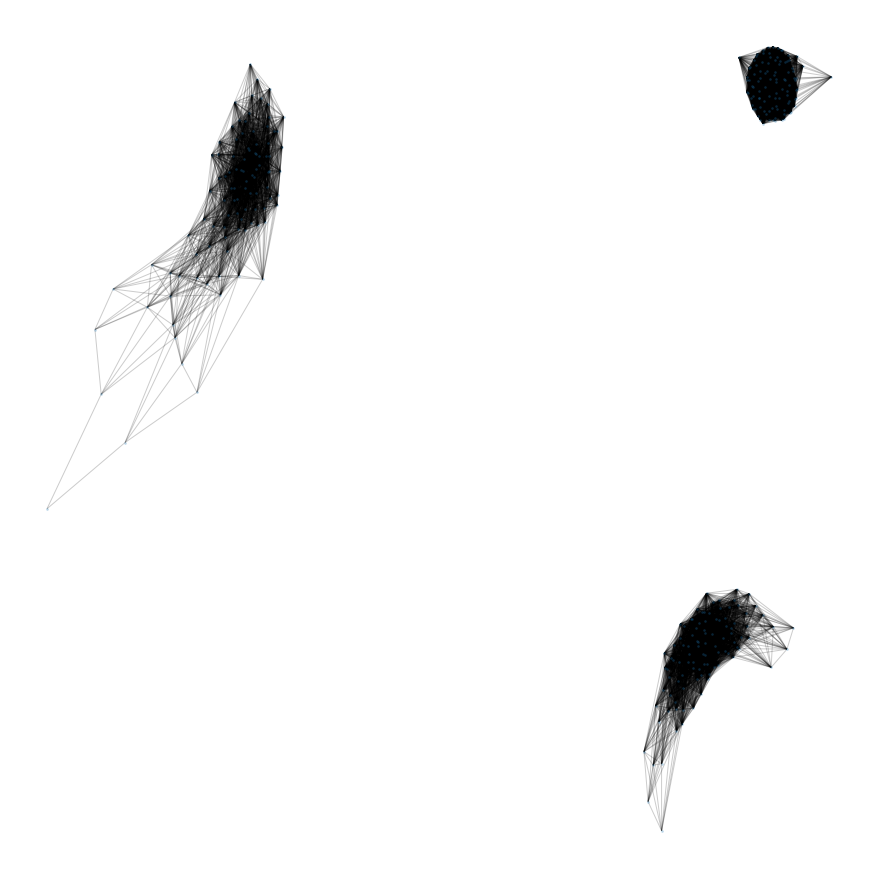

In [206]:
pos = nx.spring_layout(G)
plt.figure(3,figsize=(12,12)) 
nx.draw(G, pos=pos,node_size=3,alpha=0.2)

### Communities

#### What is the number of communities in nets[1]?

In [207]:
#find the community structure of nets[1] and print the number of communities in nets[1]
nets[1]

#### How could you know it without running community detection?

#### What is the number of communities in the meta-network G?

In [0]:
#find the community structure of nets[1] and print the number of communities in nets[1]

#### Explain why is there this number of communities in G? 